![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

# Data Preprocessing

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

penguins_df = pd.read_csv("penguins.csv")
dummies = pd.get_dummies(penguins_df['sex'], prefix='sex', drop_first=False)
penguins_df = pd.concat([penguins_df,dummies], axis=1)
penguins_df = penguins_df.drop(columns = ['sex'])
penguins_df.head()

scaler = StandardScaler()
scaled_data = scaler.fit_transform(penguins_df)

# Detecting the optimal number of clusters using the Elbow Method

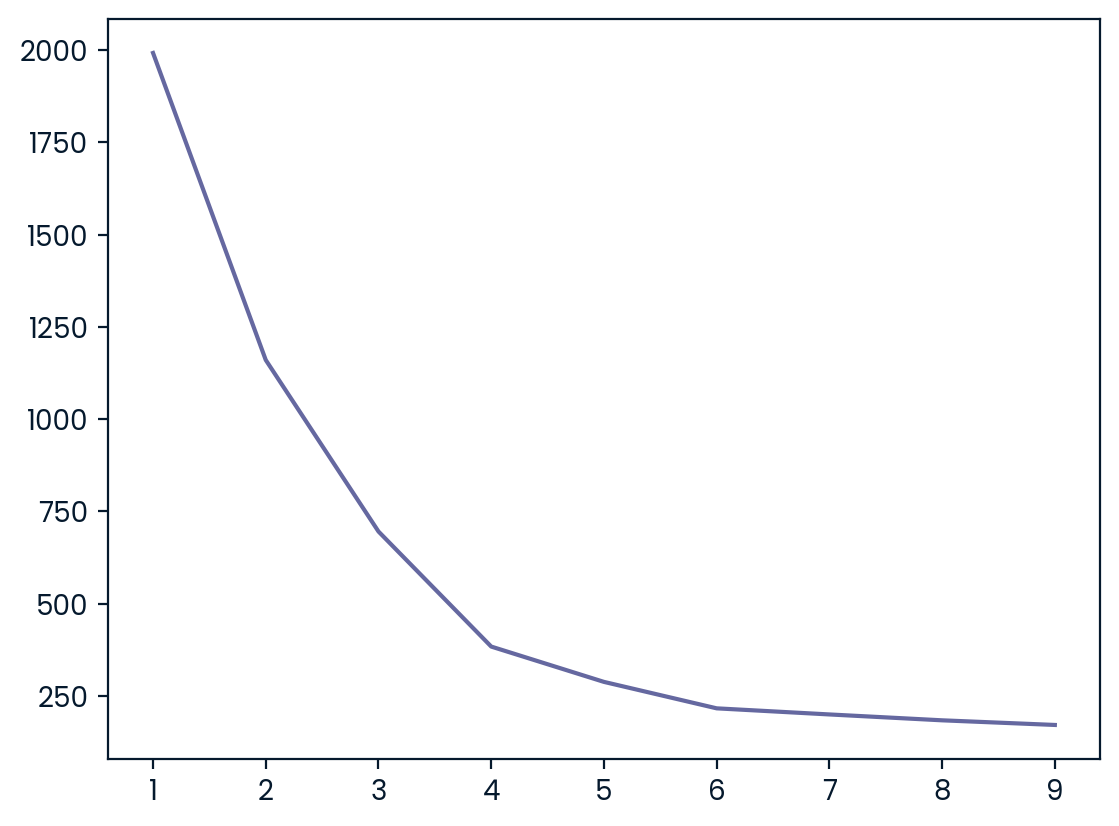

In [41]:
inertia = []
for i in range (1,10):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.plot(range(1,10), inertia)

# Runing the k-means clustering algorithm

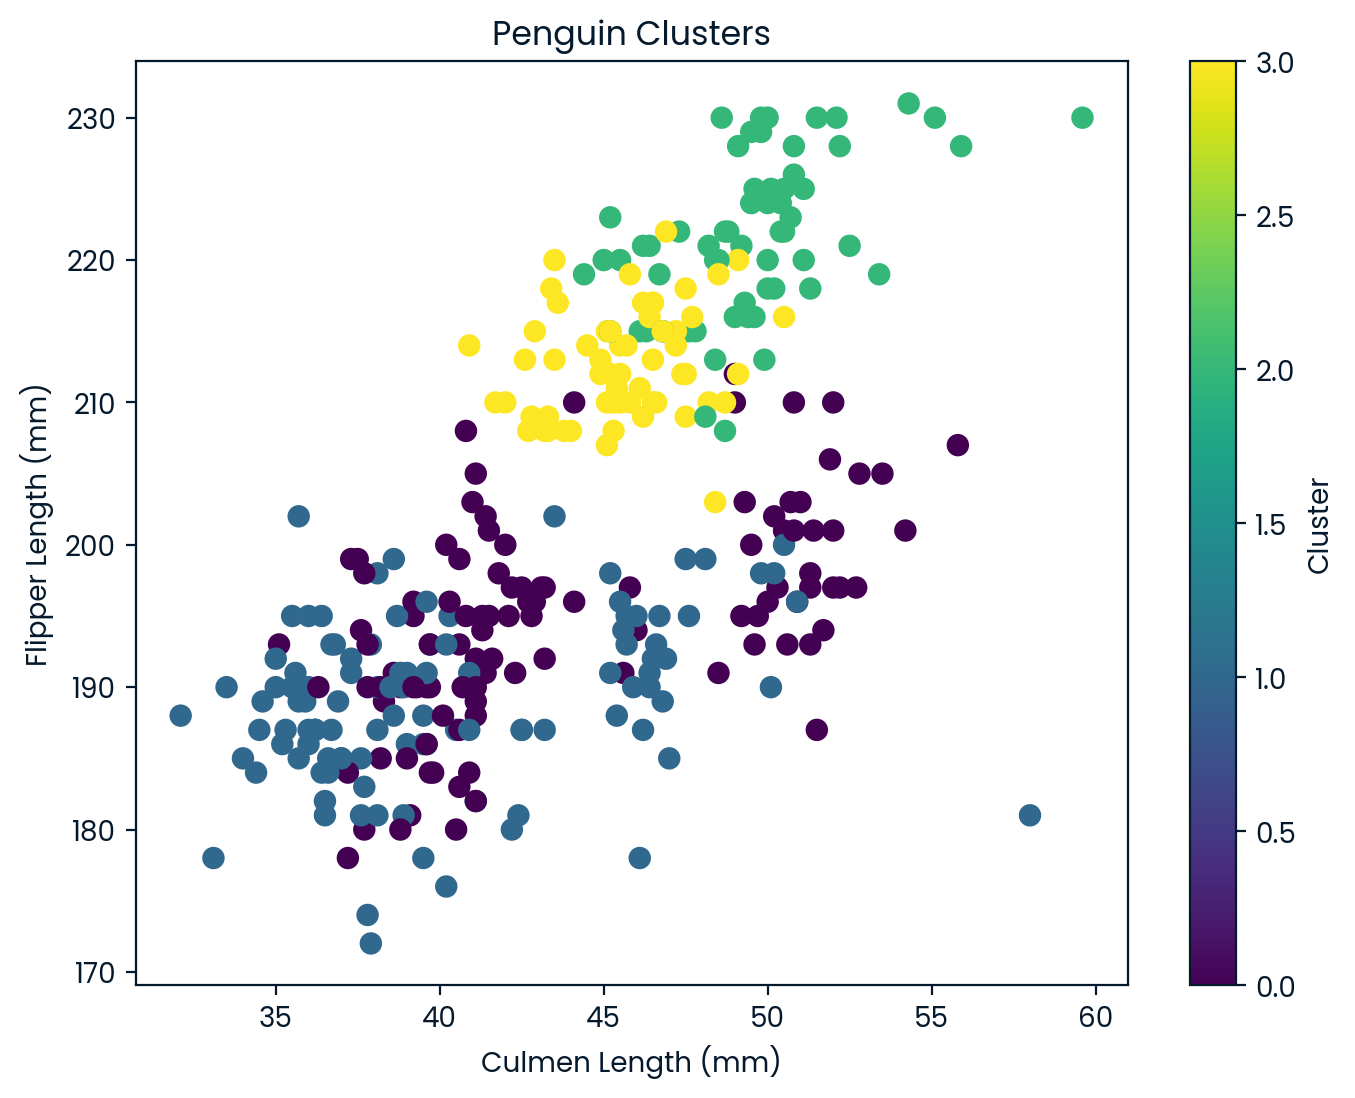

In [42]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(scaled_data)
penguins_df['cluster'] = kmeans.labels_
plt.figure(figsize=(8,6))
plt.scatter(penguins_df['culmen_length_mm'],
            penguins_df['flipper_length_mm'],
            c=penguins_df['cluster'],
            cmap='viridis',
            s=50)
plt.xlabel('Culmen Length (mm)')
plt.ylabel('Flipper Length (mm)')
plt.title('Penguin Clusters')
plt.colorbar(label='Cluster')
plt.show()

# Creating a final statistical DataFrame for each cluster.

In [43]:
numeric_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
stat_penguins = penguins_df.groupby('cluster')[numeric_columns].mean()
print(stat_penguins)

         culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
cluster                                                                   
0               43.878302        19.111321         194.764151  4006.603774
1               40.217757        17.611215         189.046729  3419.158879
2               49.473770        15.718033         221.540984  5484.836066
3               45.563793        14.237931         212.706897  4679.741379
